---

# 🐬 **The Ocean Impact Tutorialized Analysis** 🌊

---

In this project, you will be walking through basic data analysis skills allowing you to take a relatively unknown dataset, ask statistically critical questions across it, and extract unique and useful insights that allow you to make judgments across the data as a whole. 

### 👁‍🗨 Before we go any further, let's get comfortable with the emoji/emote syntax.

We'll be using emojis and emotes to designate different sections and partitions of our tutorial walkthrough. 

You can reference this legend at any time to better understand each section's meaning and interpretation.

    - [👁‍🗨]: Clarifying Information/Note.
    - [►]: External Link Access.
    - [🌀]: Obfuscated Code Flag. (A.K.A. User Does Not Have To Understand/Replicate This Code!)
    - [⚡️]: Outer Section Header: Denotes Broad Analytic Concept.
    - [🔸]: Inner Section Header: Denotes Small Analytic Topic.
    - [🔹] Analysis Segment. (Run Essential Code.)
    - [📍]: Important Project Checkpoint. (Double Check Progress!)
    - [❓]: Hypothesis Proposal. (Initial Question Ask.)
    - [🔻]: Hypothesis Introduction. (Starting a Question-Based Investigation.)
    - [🔺]: Hypothesis Conclusion. (Answering a Question-Based Investigation.)
    - [🔎][🔍]: Analytic Objective. (Standard Required Assignment.)
    - [🚀]: External Task Addendum. (Requires Changes to be Made in Separate File.)
    - [🌜][🌛]: Moonshot Objective. (Stretch Challenge Assignment.)

---

# ⚡️ INTRODUCTION: Understanding Our Data

---

It's often encouraged for many introductory students of data analysis to get comfortable in diving headfirst into scrubbing, cleaning, sifting, and extracting insights from a new dataset.

While this is incredibly useful to build a general comfortability around performing data analysis, we must understand that we are working within the realm of _data science_, not data tinkering. 

As such, when faced with new and unexpectedly complex data, it is equally important to take our time in carefully investigating and building an understanding as to what we can do and should do to cleanse and analyze the data at hand.

## 🔸 PART 1: Cleansing Our Data

Before conducting any type of analysis - even prior to asking critical questions - it's important to ensure the integrity and reliability of our dataset for programmatic purposes.

Let's focus on the following steps to ensure cleanliness of our data:
- **IMPORT dataset as dataframe.**
- **IMPUTE null values.**
- **EXCLUDE redundant features.**

#### 🔹 Firstly, let's import any and all tools we'll need to conduct our investigation.

**NOTE**: All modules should import correctly, with the _possible_ exception of the `autoreload` external package. 

This is an interesting module that you may have to download separately and restart your IPython kernel in order to instantiate it successfully.

The use of the `autoreload` package is simple: it allows you to update any objects and/or files that your notebook is making use of externally _without_ having to rerun the notebook's kernel in order for the changes to take effect within the notebook.

In other words, it "reloads" the notebook in the background every time you make a change to any dependency that the notebook is using. 

► **[You can read more about the reloading module here.](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html)**

In [1]:
# Data Analysis/Visualization Toolkit.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})

# Scientific Analysis Operations Toolkit
from scipy import stats

# Warning Ignorance.
import warnings
warnings.filterwarnings("ignore")

# Image Handling
from IPython.display import Image

# Relative Filepath Handling
import sys
sys.path.append("../reference/")

# Dependency Reloading Module
# %load_ext autoreload
# %autoreload 1

#### 🔹 Next, we'll import some custom utilities that we'll be working with to analyze our data more deeply.

In particular, one custom object – the `Visualizer()` class instance – will be incredibly helpful in transforming and rendering our analysis findings into custom visualizations that are easy-to-understand. 

In [2]:
from structures import *

In [3]:
visualizer = Visualizer()

For the majority of this notebook, you'll be working from a programmatic dependency paradigm: _changes you make in dependent files will impact the effectiveness of your analysis and visualization work in this notebook._

As such, please become comfortable with looking over and accessing the `Visualizer` object, either in Jupyter Lab or in another IDE of your choice.

### 👁‍🗨 Let's disseminate the source and accessability of our target dataset.

For this investigation, we'll be looking into a dataset describing trends and factors relating to endangered fish. 

Specifically, this dataset was extracted and obtained from a research paper published by the Society of Environmental Toxicology and Chemistry depicting the chemical/environmental tolerance and sensitivity of freshwater fish species located in aquatic basins in the Northeastern United States. 

The specific research paper is as follows: 

```
Griffith, M. L. Zheng, and S. Cormier. Using extirpation to evaluate ionic tolerance of freshwater fish. ENVIRONMENTAL TOXICOLOGY AND CHEMISTRY. Society of Environmental Toxicology and Chemistry, Pensacola, FL, USA, 37(3): 871-883, (2018). 
```

► **[You can access the research paper here.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5886021/)**

This dataset was extracted and condensed into a downloadable format that you can access at any time via the repository link on Kaggle. Alongside the dataset, you can access descriptive information regarding the data's distribution as well as basic discussion on the nature of the data.

► **[You can access the Kaggle dataset here.](https://www.kaggle.com/harshithgupta/endangered-fish-data)**

⚠️ NOTE: Some visualizations are converted and improved upon from tutorialized visualizations from the dataset uploader's initial investigations. 

### 🌜 MOONSHOT OBJECTIVE: Publication Comprehension.

For this stretch challenge, try and read through the associated research paper to better understand the study and dataset curation process.

#### 🌛 Write any interesting findings from the research paper below.

```
- SPACE RESERVED FOR STRETCH CHALLENGE: PUBLICATION COMPREHENSION.

- SPACE RESERVED FOR STRETCH CHALLENGE: PUBLICATION COMPREHENSION.

- SPACE RESERVED FOR STRETCH CHALLENGE: PUBLICATION COMPREHENSION.
```

#### 🔹 Let's identify our dataset and data dictionary.

Both should be included already as project-dependent data and reference files.

You may access them on the course GitHub repository by navigating to **[this link](https://github.com/Make-School-Courses/DS-1.1-Data-Analysis)** and downloading the following files:

► **[Endangered Fish Dataset](https://raw.githubusercontent.com/Make-School-Courses/DS-1.1-Data-Analysis/master/Datasets/Endangered_Fish_Data.csv)**

► **[Endangered Fish Data Dictionary](https://raw.githubusercontent.com/Make-School-Courses/DS-1.1-Data-Analysis/master/Datasets/Endangered_Fish_Column_Metadata.csv)**

#### 🔹 Now, let's read in our dataset and data dictionary.

In [5]:
df_eda =      pd.read_csv(PATH_EXT)
df_datadict = pd.read_csv(PATH_DICT).T

# Set dataframe feature names to dataset feature names
df_datadict.columns = df_datadict.iloc[0]
df_datadict.drop(df_datadict.index[0], inplace=True)

By calling `.head()` on each of our imported datasets, we can see our target dataset as well as the very helpful data dictionary.

In the following cell, we'll quickly set some dataframe properties for our viewing comfort.

In [6]:
# Instantiate dataframe viewing properties
VIEWING_PROPERTIES = {
    "background-color": "Aquamarine",
    "color": "black",
    "border-color": "white"
}

Take some time to poke around the data and see what types of features and labels exist. 

This will become increasingly important as we progress from basic comprehension and cleaning into analysis and processing: it's imperative that our dataset understanding guide our ability to manipulate and visualize data.

From here on out, we can use the set viewing properties to render a better table view whenever calling `.head()` on our data.

In [7]:
# Set dataframe viewing properties for dataset
df_eda.head(3).style.set_properties(**VIEWING_PROPERTIES).highlight_null(null_color="red")

,species,state,HUCName,Common_Name,Dataset,Station_Date,SITE_ID,YEAR,month,ECOREGL3,LAT_DD,LON_DD,HUC,BigHUC,FE,MN,PHSTVL,COND,TP,CA,SO4,NO3,CL,alk,do,Temp,rbpscore,GENUS,ABUND,SUMCOUNT,NUMSPEC,NSBENT_INV,NSBENT_INV_NONTOL,NSINTOL,PINTOL,PBENT_INV,PBENT_INV_NONTOL,WS_AREA,LWSKM2,abent_inv,abent_inv_nontol,aintol,ns_DarScuMad,ab_DarScuMad,p_DarScuMad,Station_Year,lcond,SO4HCO3,ratio,TotCount,RA,FOR_TOT,hardness,Fecal_Coliform,xembed,pct_safn,VISIT_NO,num,mg,na,k,hco3,tn,al,Se,Cadmium,Calcium
0,Ambloplites rupestris,OH,nan,Rock Bass,OH,200282_38909,200282,2006,8,70,38.988300,-83.332800,506,500,nan,nan,7.150000,287.000000,nan,nan,nan,nan,nan,nan,nan,nan,69.500000,Ambloplites,9.000000,553.000000,nan,nan,nan,nan,nan,nan,nan,20.000000,1.301030,nan,nan,nan,nan,nan,nan,200282_2006,2.457882,nan,nan,553.000000,0.016270,nan,nan,nan,nan,nan,1,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,Campostoma anomalum,OH,nan,Central Stoneroller,OH,200282_38909,200282,2006,8,70,38.988300,-83.332800,506,500,nan,nan,7.150000,287.000000,nan,nan,nan,nan,nan,nan,nan,nan,69.500000,Campostoma,58.000000,553.000000,nan,nan,nan,nan,nan,nan,nan,20.000000,1.301030,nan,nan,nan,nan,nan,nan,200282_2006,2.457882,nan,nan,553.000000,0.104880,nan,nan,nan,nan,nan,1,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,Catostomus commersonii,OH,nan,White Sucker,OH,200282_38909,200282,2006,8,70,38.988300,-83.332800,506,500,nan,nan,7.150000,287.000000,nan,nan,nan,nan,nan,nan,nan,nan,69.500000,Catostomus,7.000000,553.000000,nan,nan,nan,nan,nan,nan,nan,20.000000,1.301030,nan,nan,nan,nan,nan,nan,200282_2006,2.457882,nan,nan,553.000000,0.012660,nan,nan,nan,nan,nan,1,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan


Now that we have access to our dataset, let's take a quick look at our data dictionary.

In [8]:
df_datadict.style.set_properties(**VIEWING_PROPERTIES)

Column Heading,species,state,HUCName,Common_Name,Dataset,Station_Date,SITE_ID,YEAR,month,ECOREGL3,LAT_DD,LON_DD,HUC,BigHUC,FE,MN,PHSTVL,COND,TP,CA,SO4,NO3,CL,alk,do,Temp,rbpscore,GENUS,ABUND,SUMCOUNT,NUMSPEC,NSBENT_INV,NSBENT_INV_NONTOL,NSINTOL,PINTOL,PBENT_INV,PBENT_INV_NONTOL,WS_AREA,LWSKM2,abent_inv,abent_inv_nontol,aintol,ns_DarScuMad,ab_DarScuMad,p_DarScuMad,Station_Year,lcond,SO4HCO3,ratio,TotCount,RA,FOR_TOT,hardness,Fecal_Coliform,xembed,pct_safn,VISIT_NO,num,mg,na,k,hco3,tn,al,Se,Cadmium,Calcium,Species,Common name,Genus
Description,Species names,State,Hydrologic unit name,Common_Name,Data sources,StationID + Sampling Date,Station Identifier,Year,Month (from date),Level 3 ecoregion,Decimal degree latitude,Decimal degree longitude,Hydrologic unit,HUC4 unit,Iron (mg/L),Manganese (mg/L),standard pH,Conductivity (µS/cm),Total Phosphorus,Calcium (mg/L),SO4 (mg/L),Nitrite (mg/L),Chloride (Cl mg/L),Alkalinity,Dissolved Oxygen,Water Temperature (°C),RBP habitat score,Genus,abundance,Total Count,Number of species,Number of native benthic invertivore species,"Number of native, non-tolerant benthic invertivore species",Number of intolerant species,Percent Intolerant,Percent of individuals that are native benthic invertivores,"Percent of individuals that are native, non-tolerant benthic invertivores",Watershed area (km2),Log10 transfomred watershed size (km2),Abundance of native benthic invertivores,"Abundance of native, non-tolerant benthic invertivores",Abundance of intolerant species,"Number of darter, sculpins or madtom species","Abundance of darters, sculpins and madtoms","Percent of individuals that are darters, sculpins or madtoms",StationID + Sampling Year,log10 transformed conducitivity,SO4 + HCO3 (mg/L),SO4 + HCO3/ Cl (mg/L),Total Count,Relative abundance,% Forested,hardness (mg/L),fecal coliform bacteria count (per 100 mL water),% embeddedness,% sand + fine,Visit Number,"Was a temporary variable used to create the variable, visit_no, in the Ohio data set.",Magnesium (mg/L),Sodium (Na mg/L),Potassium (mg/L),HCO3 (mg/L),Total nitrogen (mg/L),Aluminum (mg/L),Selenium (mg/L),Cadmium (mg/L),Calcium (mg/L),Taxa Species,Sample Collection Method Name,Genus Taxonomic Rank


We can see that for each value in `Column Heading`, there appears a subsequent descriptive value in `Description`. 

Each of the former values correspond to an associated feature name (column name) in our external dataset, while the latter values correspond to the meaning and interpretation behind each feature. 

For instance, feature `WS_AREA` corresponds to the associated `Watershed area (km2)` description, indicating that the column contains data relating to the current species's watershed environment, measured in square kilometers. 

#### 🔹 Just for reference, let's see the shape of our dataset.

In [9]:
np.shape(df_eda)

(42336, 67)

This indicates that we have sixty-seven (67) features across our data and a little over forty-two thousand (42,000+) data points to investigate. 

#### 🔹 Next, it's incredibly important to see if any null values exist in our dataset.

We can already see with our prior null value rendering of our external data that null values certainly exist. 

However, do find more explicit values, we'll have to programmatically investigate. 

In [10]:
pd.DataFrame(df_eda.isnull().sum()).T

,species,state,HUCName,Common_Name,Dataset,Station_Date,SITE_ID,YEAR,month,ECOREGL3,...,num,mg,na,k,hco3,tn,al,Se,Cadmium,Calcium
0,0,0,459,9757,0,0,0,0,0,0,...,26857,23367,23755,23808,22085,22564,38171,41344,42336,42259


We can see that null values exist all throughout our dataset; however, it's important to discern that the proportionate quantity of null values differs across distinctive features. 

For instance, we can observe the `HUCName` feature (**Description:** `Hydrologic Unit Name`) that contains approximately 400-500 null values. 

Proportionately, 400-500 data points out of 42,000+ isn't a terrible ratio of nullified data, indicating that while those specific null values are useless, the feature as a whole retains a good portion of useful data. 

Contrast that with the `Se` feature (**Description:** `Selenium (mg/L)`) that contains approximately 41,000+ null values.

Proportionately, 41,000+ data points out of 42,000+ is a massive ratio of nullified data, indicating that while some useful data points still exist across the feature, the overwhelming majority of that feature's data points are noisy and useless. 

### 👁‍🗨 Understanding Null Value Distribution is Important for Predictive Analysis.

For the intents and purposes of our current investigative analysis, we will not have to perform serious null value imputation to our dataset since it's relatively unclear whether or not our null values will dramatically impact the ability for us to understand our data.

However, when working on predictive analyses (DS 2.1+), imputing and replacing null values are incredibly important since a single null value can potentially skew, obfuscate, or crash predictive modeling and accuracy attainment. 

### 🔎 ANALYTIC OBJECTIVE: Null Value Imputation.

For this **required** challenge, impute null values across the dataset by finding a way to replace them with other values for improved investigate comprehensibility. 

To aid you in this required challenge, two resources will be provided:

► **[This Pandas documentation should help provide several utility functions for handling missing data.](https://pandas.pydata.org/docs/reference/series.html#missing-data-handling)**

► **[This Towards Data Science article should help provide clarity in generally working with null data.](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779)**

This challenge is particularly open-ended and complex, so feel free to approach it lightly and experimentally.

### 🔍 Perform Null Value Imputation Processes in this Cell.

In [11]:
# SPACE RESERVED FOR ANALYTIC OBJECTIVE: NULL VALUE IMPUTATION.

Now that we've sufficiently assessed null value distribution across our dataset, let's move on to another type of redundant data.

Identifying and removing redundant features is slightly more creative and less straightforward than null value imputation, because it often is left to user judgment as to which features are important to preserve and which are unimportant and can be discarded.

Thankfully, many of the redundant features across our current data are obviously so.

#### 🔹 Let's identify and remove redundant features via feature comprehension.

What we mean by "feature comprehension" is understanding a feature simply by what value it's providing for our dataset.

In other words, if a feature appears to not be adding any significant value for data analysis and processing, let's get rid of it! 

In [12]:
for feature, description in df_datadict.T.iloc[:].iterrows():
    if feature in df_eda.columns.tolist():
        print("> `{}`: `{}`.".format(feature, description.Description.upper()))

> `species`: `SPECIES NAMES`.
> `state`: `STATE`.
> `HUCName`: `HYDROLOGIC UNIT NAME`.
> `Common_Name`: `COMMON_NAME`.
> `Dataset`: `DATA SOURCES`.
> `Station_Date`: `STATIONID + SAMPLING DATE`.
> `SITE_ID`: `STATION IDENTIFIER`.
> `YEAR`: `YEAR`.
> `month`: `MONTH (FROM DATE)`.
> `ECOREGL3`: `LEVEL 3 ECOREGION`.
> `LAT_DD`: `DECIMAL DEGREE LATITUDE`.
> `LON_DD`: `DECIMAL DEGREE LONGITUDE`.
> `HUC`: `HYDROLOGIC UNIT`.
> `BigHUC`: `HUC4 UNIT`.
> `FE`: `IRON (MG/L)`.
> `MN`: `MANGANESE (MG/L)`.
> `PHSTVL`: `STANDARD PH`.
> `COND`: `CONDUCTIVITY (ΜS/CM)`.
> `TP`: `TOTAL PHOSPHORUS`.
> `CA`: `CALCIUM (MG/L)`.
> `SO4`: `SO4 (MG/L)`.
> `NO3`: `NITRITE (MG/L)`.
> `CL`: `CHLORIDE (CL MG/L)`.
> `alk`: `ALKALINITY`.
> `do`: `DISSOLVED OXYGEN`.
> `Temp`: `WATER TEMPERATURE (°C)`.
> `rbpscore`: `RBP HABITAT SCORE`.
> `GENUS`: `GENUS`.
> `ABUND`: `ABUNDANCE`.
> `SUMCOUNT`: `TOTAL COUNT`.
> `NUMSPEC`: `NUMBER OF SPECIES`.
> `NSBENT_INV`: `NUMBER OF NATIVE BENTHIC INVERTIVORE SPECIES`.
> `NSBENT_INV_

### 👁‍🗨 It is important to make and defend assertions pertaining to major steps like removing features.

After all, in a professional context, it is incredibly important to be able to justify a decision that transforms, imputes, or removes data from our original dataset. 

(And at the very least, you don't want to be in the position where you can't remember exactly what feature(s) you may have removed and why you did so!)

Anyway, based on all the information provided, two features stick out as entirely redundant for any useful analysis at this time.

- `Station_Date` merely concatenates the `Station_ID` and `YEAR` features into a single string and makes it more difficult to interpret either in the process. 

- `num` is a poor feature name and is described as a temporary variable to generate another already-existing feature `VISIT_NO`. 

#### 🔹 As such, we can feel comfortable in removing both features from our data.

In [13]:
REDUNDANT_FEATURES = ["Station_Date", "num"]

df_eda.drop(columns=REDUNDANT_FEATURES, inplace=True)

### 🌜 MOONSHOT OBJECTIVE: Additional Feature Redundancy Identification & Removal.

For this stretch challenge, can you determine if there are any other features across our dataset that don't appear to be adding useful value on their own, or otherwise appear noisy and indeterminate?

If so, feel free to identify additional features across our dataset and remove them similarly to our process above! 

### 🌛 Perform Additional Feature Imputation in this Cell.

In [14]:
# SPACE RESERVED FOR MOONSHOT OBJECTIVE: ADDITIONAL FEATURE REDUNDANCY IDENTIFICATION & REMOVAL.

### 📍 Double-check and make sure you've walked through all three data cleaning steps.

They're very basic, but they help set the groundwork and foundation for ensuring that we can comfortably work with data questioning, investigation, and visualization.

### 🔎 ANALYTIC OBJECTIVE: Investigative Feature Consideration.

For this **required** challenge, step into the shoes of a professional data scientist and look back at the columns/features that this dataset contains. 

Your task is simple: identify at least **five (5)** features that you believe would be interesting to investigate from an analytic and visualization point-of-view. 

Create a new dataframe called `df_top_five` that holds your five interesting features and display it in the first cell below.

Additionally, make use of the currently loaded data dictionary (`df_datadict`) and create a new dataframe called `df_datadict_top_five` that displays the descriptive column information for each of the five interesting features you've selected; make sure that's displayed in the second cell below.

Finally, create your own custom viewing properties and render your dataframes with custom colors and backgrounds. Be creative!

(**NOTE**: A non-custom and bland dataframe will lose points!) 

### 🔍 Perform Your Investigative Feature Consideration: Top Five Dataset Columns.

In [15]:
# SPACE RESERVED FOR ANALYTIC OBJECTIVE: INVESTIGATIVE FEATURE CONSIDERATION.

### 🔍 Perform Your Investigative Feature Consideration: Top Five Data Dictionary Columns.

In [16]:
# SPACE RESERVED FOR ANALYTIC OBJECTIVE: INVESTIGATIVE FEATURE CONSIDERATION.

At this point, we can be confident that our data has been rudimentarily cleansed and is prepared and ready for basic analysis!

---

# ⚡️ METHODS: Analyzing Our Data

---

Now that our dataset has been sufficiently cleansed and validated, we can begin posing critical questions and diving into the data more indulgently to better understand what we're working with. 

If you recall from **QL 1.1** and early lessons in **DS 1.1**, it's important to distinguish what are descriptive/inferential statistical questions vs. predictive analysis questions. 

### 👁‍🗨 After all, we're focusing primarily on descriptive and inferential hypothesis-based questions.

**DESCRIPTIVE AND INFERENTIAL STATISTICAL QUESTIONS** involve ascertaining patterns, relationships, attributes, and parameters across a dataset that can be obtained with direct calculation and statistical testing. 

In other words, they work with modifying and manipulating the data, but only to allow our data to tell us stories based on how it looks like.

**PREDICTIVE ANALYSIS QUESTIONS**, on the other hand, involve relying more heavily on complex mathematics-based models and algorithms to use the aforementioned patterns, relationships, attributes, and parameters to tell us deeper and more elusive insights pertaining to our data.

In other words, they work with ingesting and processing the data in order to tell us _something new_... something we couldn't have concluded through calculation or basic programming.

For instance, for the (in)famous Titanic dataset, examples of descriptively statistical questions may include the following:

    - How many passengers survived vs. died across each different passenger class?
    - How much larger of a percentage of women and children survived vs. men? 
    - How many families (2+ related passengers) were on board the Titanic?

Additionally, some examples of inferentially statistical questions are as follows:

    - What is the relationship/correlation between passengers' embarkment location vs. their passenger class?
    - What does the shape/distribution of passenger age data look like? Is the data skewed in any way?
    - What proportion of passenger fare data is outlying? 

It's clear that while inferential questions differ in terms of complexity as opposed to the more simplistic and rudimentary descriptive questions, both questions focus primarily on investigating how our data looks and what patterns it can tell us directly.

In contrast, take a look at some examples of predictively analytical questions:

    - If a new passenger embarked in Cherbourg as a first-class passenger, would they have survived?
    - How much would a passenger have paid if they were a second-class passenger named Simon?
    - If Jack and Rose were real Titanic passengers, would Jack really have died and Rose really have lived? 

An incredibly important idea to note for predictively analytical questions is that they ask about **certainty** as opposed to **likelihood**: the former necessitates predictive analytics in order to come to a hypothetical decision, whereas the latter can be considered a complex inferentially statistical problem. 

Finally, keep in mind, the goal of this tutorial project is _not_ to predictively model our data in any way: **we do NOT want to be asking predictive statistical questions**. 

### 👁‍🗨 We want to be asking questions that directly deconstruct and visualize the data at hand.

Now that we've covered all that, let's dive into some hypothesis-based inquiry proposals!

## 🔸 PART 2: Posing Hypothesis-Based Inquiries

In the following section, you'll be given a conglomeration of investigative statistical hypotheses and critical questions pertaining to better disseminating our data. 

#### Our goal is to be able to take some of these questions – as well as some you'll be asking yourselves – and answering them conclusively with findings, insights, and visualizations.

Remember at all times: _when given a question or hypothesis, finding an answer is simply a roll of the dice_!

No, really! When in doubt or when stumbled by a particularly challenging statistical inquiry, just remember **D.I.C.E.**:

1. **DECONSTRUCT** the question and break it down into relative features, labels, and needed calculations. 
2. **INVESTIGATE** your dataset and filter it down until you have the data you need to answer the question.
3. **CREATE** a visualization based on what option makes most sense to portray results in a clear manner.
4. **EXPLAIN** your findings and visualization(s) concisely, using bullet points and assertions to justify your process.

Let's start with some basic questions pertaining to the distribution of various species across state regions.

#### ❓ Q1: What is the average proportion of cumulative endangered fish species that live in each state? 

#### ❓ Q2: What does the regional distribution of all endangered fish species across all states look like?

To answer these questions, we'll need to identify the relationship between endangered fish species populations and their regional habitats and find a way to best visualize them.

It's clear at least that for our first question, basic deconstruction reveals that we'll need to make use of columns associating the number of fish species as well as the state by which the endangered fish resides.

Investigating our dataset and data dictionary for both label occurrences lets us know that two features do exist for those requirements: `NUMSPEC` and `state`, respectively.

#### 🔻 For the first question, the best approach seems to be creating a _bar plot_ of some kind to show the quantity of fish species per state.

#### 🔹 Let's Start by Calculating Mean Number of Endangered Fish Species per State

To do this, we'll need the `NUMSPEC` feature (**Description:** `Number of Species`) and the `state` feature (**Description:** `State`) from our dataset.

In [17]:
# Cast dataframe with answers for Question 1
df_q1 = pd.DataFrame(df_eda.groupby("state")["NUMSPEC"].mean()).reset_index()
df_q1.columns = ["state", "MEANNUMSPEC"]
df_q1 = df_q1.sort_values(by="MEANNUMSPEC", ascending=True)

# Showcase Q1 data
df_q1

,state,MEANNUMSPEC
2,NJ,9.000000
4,PA,14.144847
5,VA,14.825898
0,KY,16.111615
6,WV,18.605809
1,MD,21.609272
3,OH,NaN


Immediately we can see a problem: the values for the state of Ohio are null – probably due to an overwhelming abundance of missing values for the `NUMSPEC` data for that specific state. 

(That would explain why it appears there existed columns specific for obtaining data for Ohio: Ohio's fish population data may have been added later and probably has conflicting information to the rest of the data.) 

For now, let's just neglect Ohio's data since it adds nothing to our problem and visualization.

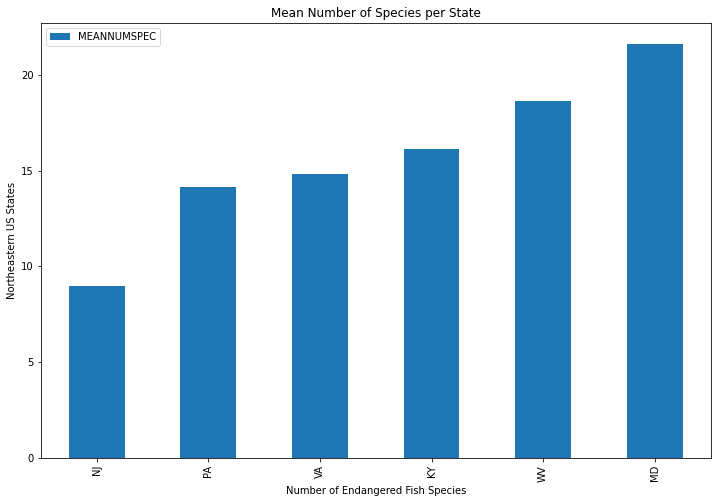

In [18]:
# Set Ohio as redundant label for removal
REDUNDANT_LABELS_Q1 = (df_q1["state"] != "OH")

# Remove Ohio from Q1 dataset's labels
df_q1 = df_q1[REDUNDANT_LABELS_Q1]

# Create bar chart visualization to showcase results
ax = df_q1.plot(kind="bar", 
                figsize=(12, 8),
                title="Mean Number of Species per State")
plt.xlabel("Number of Endangered Fish Species")
plt.ylabel("Northeastern US States")
plt.xticks(range(len(df_q1["state"])), df_q1["state"])
plt.show()

Our chart looks great, but perhaps we can improve it a little more to better showcase resultant means and improve viewability? 

(Remember, our goal for visualization and investigation is to both get results and to make them accessible and clear to understand.)

Our chart isn't bad, but we can do better! 

#### 🌀 Let's Functionally Improve Our Visualization for Clarity

NOTE: Functional code hidden for improved clarity and reduced obfuscation.

In [19]:
def classless_q1(stacked=False, save=False):
    """ Custom function to visualize answers for Q1 of the OITA project. """
    # Instantiate grid spaces across bar chart for both title and plot
    if stacked is True:
        figure = plt.figure(figsize=(12, 12))
        grids = figure.add_gridspec(2, 1)
        grids.update(wspace=0.3, hspace=0.15)
        ax0 = figure.add_subplot(grids[0, 0])
        ax1 = figure.add_subplot(grids[1, 0])
    else:
        figure = plt.figure(figsize=(18, 7))
        grids = figure.add_gridspec(1, 2)
        grids.update(wspace=0.3, hspace=0.15)
        ax0 = figure.add_subplot(grids[0, 0])
        ax1 = figure.add_subplot(grids[0, 1])
    
    # Create and set title grid
    TITLE_AX0 = "MEAN NUMBER OF SPECIES\n____________________________\n\nSTATE"
    ax0.text(0.5, 0.5,
             TITLE_AX0,
             horizontalalignment="center",
             verticalalignment="center",
             fontsize=28,
             fontweight="bold",
             fontfamily="serif",
             color="#000000")
    
    # Remove chart labels outline from title grid
    ax0.set_xticklabels([]); ax0.set_yticklabels([])
    ax0.tick_params(left=False, bottom=False)
    
    # Set bar chart in second grid space and remove spine
    ax_states = ax1
    barp = sns.barplot(x="state",
                       y="MEANNUMSPEC",
                       data=df_q1,
                       ax=ax_states,
                       palette="crest")
    sns.despine()
    
    # Obtain and set quantitative values on top of bars
    for patch in barp.patches:
        barp.annotate(format(patch.get_height(), ".2f"), (patch.get_x() + patch.get_width() / 2.,
                                                         patch.get_height()), ha="center", va="center", 
                      xytext=(0, 10), textcoords="offset points")
    
    # Remove grid spinal outline from title grid
    for orientation in ["top", "left", "bottom", "right"]:
        ax0.spines[orientation].set_visible(False)

    # Save file
    if save is True:
        SAVEPATH = "../assets/Q1_Visualization.png"
        plt.savefig(SAVEPATH, facecolor="white")
    
    # Render visualization
    plt.show()

Visualization code is often highly obfuscated due to the myriad of small changes and alterations needed to make a chart impressive; while it's encouraged to work on this code and dissect it for your own understanding, it is not required if you can get away with making a plain and communicative visualization in less code.

#### 🔹 Now that we've written our gargantuan visualization function, let's see what we get! 

For this specific function, feel free to assign the value of the keyword argument **`stacked`** to either `True` or `False` to get different visualization layouts. 

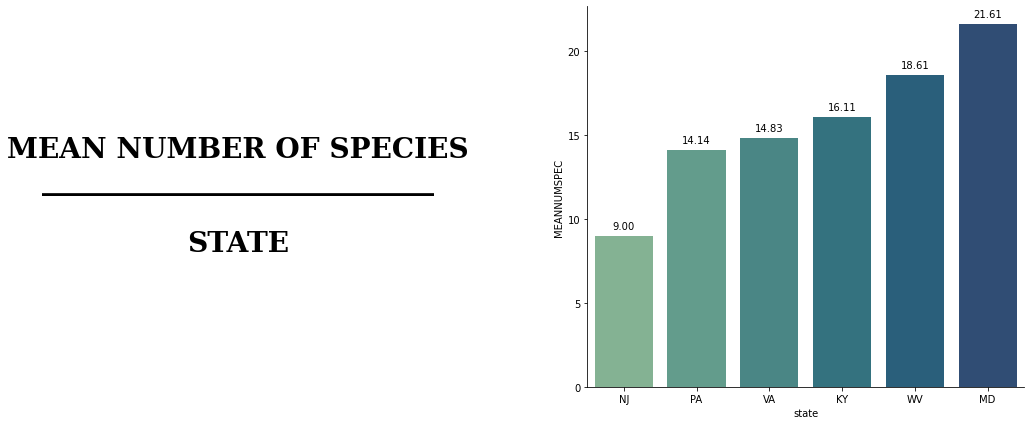

In [20]:
classless_q1(stacked=False, save=True)

Now this is a far better presentation-worthy visualization! 

While visualization entails prioritizing making results clearly communicable, there's no harm in playing with visualization tools to improve the way we can understand and interpret results. 

Thanks to `Seaborn`, we're able to render improved visualizations that can clearly showcase both the distribution, exact quantified means, and overall layout in a comfortable manner. 

#### 🔺 Here, we can clearly see the average proportions of endangered fish species living in each state:
- New Jersey has an average count of exactly **nine (9)** endangered fish species.
- Pennsylvania has an average count of between **fourteen (14)** and **fifteen (15)** endangered fish species.
- Virginia has a slightly higher average count of between **fourteen (14)** and **fifteen (15)** endangered fish species.
- Kentucky has an average count of between **sixteen (16)** and **seventeen (17)** endangered fish species.
- West Virginia has an average count of between **eighteen (18)** and **nineteen (19)** endangered fish species.
- Finally, Maryland has an average count of over **twenty-one (21)** endangered fish species. 

### 🔎 ANALYTIC OBJECTIVE: Q1 Visualizer Reimplementation. 🚀

For this **required** challenge, combine your knowledge of computer science with data science by taking the `classless_q1()` custom function and re-implementing it as the `.Q1()` method for the `Visualizer()` object. 

Since this is a presentation-oriented notebook, we want to do as much as we can to remove extensive and miscommunicative scripts from view; moreover, it's good programming practice to rely on external data structures to do our heavy lifting.

Navigate to `references/structures.py` and modify the `Visualizer.Q1()` class method such that running the second cell below functionally create the same visualization that we've obtained above! 

In addition, you're tasked with several quality-of-life improvements to the method implementation in order to improve your own usability.

**Additional Reimplementation Addendums**:
    
- **[A]** Modify the function parameters so that `TITLE_AXO` can be inputted as a function keyword argument called `title`.
- **[B]** Modify the function parameters so that the bar plot variables can be inputted as keyword arguments called `x` and `y`.
- **[C]** Modify the function operations so that the quantitative values on top of bars can be toggled by keyword argument.
- **[D]** Modify the function operations so that the visualization can be saved to the `assets` folder by keyword argument.
    
For **Addendum D**, due to the newer nature of the problem, you will be provided appropriate documentation and resources for how to save visualization-type objects using Seaborn.

► **[This `matplotlib` documentation provides insightful coverage on how to save plotting figures as images.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)**

► **[This Stack Overflow thread provides good insight into modifying background parameters when saving/viewing plotting objects such that the objects are easier to visually interpret.](https://stackoverflow.com/questions/25238442/setting-plot-background-colour-in-seaborn)**

Finally, ensure that the quality of your code is appropriately commented and that your programming quality is readable and comprehensible (at least as much as Seaborn allows you to be). 

### 🔍 Perform Your Visualizer Reimplementation for Inquiry #1 🚀

In [22]:
# # INSTRUCTIONS: Run, but do not edit, the contents of this cell!

TITLE_Q1 = "MEAN NUMBER OF SPECIES\n____________________________\n\nSTATE"
dataset, x, y = df_q1, "state", "MEANNUMSPEC"

visualization.Q1(dataset=dataset, x=x, y=y, title=TITLE_Q1, 
                 toggle_quantities=True, stacked=True, save=True)

# # INSTRUCTIONS: Run, but do not edit, the contents of this cell!

### 📍 Stop and ensure you understand the obtained insights from our investigation and visualization.

From these results, we can notice that while most states contained average endangered fish species within an approximate range of fifteen (15) to eighteen (18), New Jersey and Maryland appeared to have skewed polar values, with New Jersey several counts lower and Maryland several counts higher. 

One way we could improve this investigation and subsequent visualization is to gather data on the standard deviations and variances across mean-species-per-state calculations as well. 

That way, we can see more precisely how much each state's mean values vary across one another.

### 🌜 MOONSHOT OBJECTIVE: Intermediate Statistical Extension.

For this stretch challenge, extend the dataframe investigation and visualization by calculating the standard deviation and/or variance between both `state` and `NUMSPEC` features (use inbuilt functions like `np.std` and/or `np.var`) and apply those calculations on top of the visualization in the form of _error bars_. 

This is a complex task, and as such, some resources are provided:

► **[This documentation goes into detail on `Seaborn`'s bar plotting functionality, including error bars.](https://seaborn.pydata.org/generated/seaborn.barplot.html)**

### 🌛 Perform your data investigation and visualization tasks here.

Feel free to reuse and/or modify either the `visualizer_q1` custom function provided above or the `Visualizer.Q1()` method that you've rewritten.

You may want to use the following cell to prototype your scripts for calculating standard deviation and/or variance as well as applying those metrics on top of your visualization algorithm(s). 

In [23]:
# SPACE RESERVED FOR STRETCH CHALLENGE: INTERMEDIATE STATISTICAL EXTENSION

Let's carry our momentum forward and move right on to our next descriptive/inferential question!

#### 🔻 For the second question, the best approach seems to be creating a _scatter plot_ to spatially distribute our all endangered fish species across state coordinate regions.

This will involve some mapping visualizations, which thankfully are still supported by our trusty visualization frameworks `matplotlib` and `seaborn`.

#### 🔹 Let's Start by Calculating Positional Data for Each Endangered Fish Species

Instead of evaluating average proportions for endangered fish, this time we're looking at each individual data point and its positional data. 

Thus, we'll need to get the `LON_DD` and `LAT_DD` features (**Descriptions:** `DECIMAL DEGREE LONGITUDE` and `DECIMAL DEGREE LATITUDE`) for each endangered fish species data point.

Additionally, we'll still need state-centric data so we can cluster our positional data points by state: as such, we'll also need to get the `state` feature (**Description:** `State`). 

Thankfully, this process should be much, much quicker to ascertain since not much statistical calculation is needed.

In [24]:
# Cast dataframe with answers for Question 2
ESSENTIAL_FEATURES_Q2 = ["LON_DD", "LAT_DD", "state"]
df_q2 = df_eda[ESSENTIAL_FEATURES_Q2]

# Showcase Q2 dataframe
df_q2

,LON_DD,LAT_DD,state
0,-83.3328,38.988300,OH
1,-83.3328,38.988300,OH
2,-83.3328,38.988300,OH
3,-83.3328,38.988300,OH
4,-83.3328,38.988300,OH
...,...,...,...
42331,-79.9801,38.326069,WV
42332,-79.9801,38.326069,WV
42333,-79.9801,38.326069,WV
42334,-79.9801,38.326069,WV


By now, you've probably noticed that multiple values for each state are longitudinally and latitudinally equivalent: in fact, _many_ of the values are. 

Keep in mind that for this problem, we want to cluster endangered fish species by region across the state. 

As such, there's bound to be significant overlap across many different types of fish that inhabit the same aquatic habitat.

Therefore, many of the values we've gathered likely overlap in terms of coordinate data - this is good, since that's exactly the type of relationship(s) we want to capture.

Henceforth, it doesn't look like any significant alterations are needed to move on to visualization. 

For this case, let's skip the basic `matplotlib` since spatial plotting is a task much better suited for `seaborn`.

#### 🌀 Let's Functionally Create a Spatial Scatterplot

NOTE: Functional code hidden for improved clarity and reduced obfuscation.

In [25]:
def visualizer_q2(stacked=False):
    """ Custom function to visualize answers for Q2 of the OITA project. """
    # Instantiate grid spaces across scatter plot for both title and plot
    if stacked is True:
        figure = plt.figure(figsize=(12, 12))
        grids = figure.add_gridspec(2, 1)
        grids.update(wspace=0.3, hspace=0.15)
        ax0 = figure.add_subplot(grids[0, 0])
        ax1 = figure.add_subplot(grids[1, 0])
    else:
        figure = plt.figure(figsize=(18, 7))
        grids = figure.add_gridspec(1, 2)
        grids.update(wspace=0.3, hspace=0.15)
        ax0 = figure.add_subplot(grids[0, 0])
        ax1 = figure.add_subplot(grids[0, 1])
    
    # Create and set title grid
    TITLE_AX0 = "ENDANGERED FISH POPULATIONS\n____________________________\n\nSTATE REGIONS"
    ax0.text(0.5, 0.5,
             TITLE_AX0,
             horizontalalignment="center",
             verticalalignment="center",
             fontsize=28,
             fontweight="bold",
             fontfamily="serif",
             color="#000000")
    
    # Remove chart labels outline from title grid
    ax0.set_xticklabels([]); ax0.set_yticklabels([])
    ax0.tick_params(left=False, bottom=False)
    
    # Set bar chart in second grid space and remove spine
    ax_scattered = ax1
    scap = sns.scatterplot(x="LON_DD", y="LAT_DD", data=df_q2, ax=ax_scattered, hue="state", alpha=0.5, palette="dark")
    scap.legend(loc="center left", bbox_to_anchor=(1.25, 0.5), ncol=1)
    sns.despine()
    
    # Remove grid spinal outline from title grid
    ax0.spines["top"].set_visible(False)
    ax0.spines["left"].set_visible(False)
    ax0.spines["bottom"].set_visible(False)
    ax0.spines["right"].set_visible(False)

    # Render visualization
    plt.show()

#### 🔹 Now that we've written our gargantuan visualization function, let's see what we get! 

For this specific function, feel free to assign the value of the keyword argument **`stacked`** to either `True` or `False` to get different visualization layouts. 

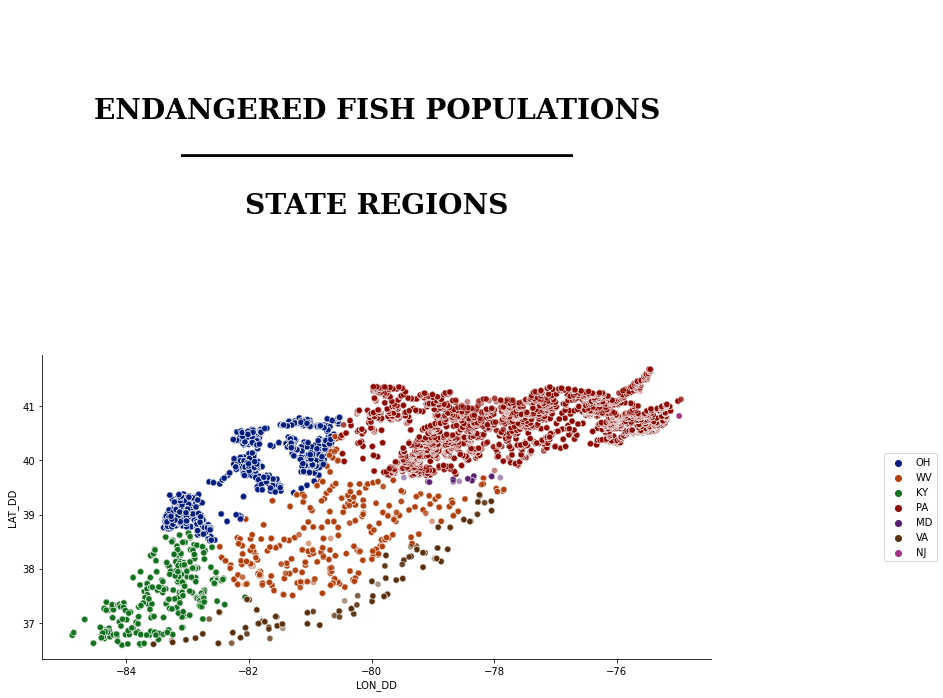

In [26]:
visualizer_q2(stacked=True)

Interesting... we can see that most plots are fairly spacially distributed around the aquatic habitats representing the Northeastern coast. 

#### 🔺 In other words, we can see how dense and spare various regional distributions of endangered fish are.

One noteworthy recognition is that the Ohio basin interestingly has an irregular density spread across its region. 

Most other state dispersions are somewhat even with some spottedness and clusters here and there, but the Ohio region seems to be highly pattern-driven: almost as if some other factor was at play in measuring and assessing the data point spread. 

What is also noteworthy is that across all seven represented states, New Jersey and Maryland appear incredibly sparse, with barely noticeable density distributions across the plot. 

#### 🔺 In fact, it's even more interesting considering New Jersey and Maryland were our two outlying responses for our first question.

### 👁‍🗨 Consider and answer how those two states could stand out across both of our investigate inquiries.

```
- SPACE RESERVED FOR RESPONSE.
```

Now that you've taken some time to deconstruct that, let's propose one final investigative inquiry to look into.

And let's make this a fun one.

In [27]:
Image(url="https://huntfishmanitoba.ca/wp-content/uploads/2020/03/Melissa-Lindsay.jpg", width=600)

This is an _Oncorhynchus mykiss_, better known to the rest of the world as a **rainbow trout**. 

It's a popular fish for – surprise! – fishing, but it also is quite the herald of healthy aquatic habitats across the Northeastern United States. 

It also happens to be one of several fishes under investigation currently via our particular endangered species dataset.

As it happens, our data is able to track much more than just spatial data and number of species!

### 👁‍🗨 We can also observe how fish species adapt and respond to water composition and temperature.

I don't know about you, but I'm fascinated with finding out how our rainbow trout has responded and adapted over the years to variations in water composition and temperature. 

That said, let's pose some questions around that very fascination!

#### Q3: ❓ How does water conductivity (measure of ionic concentration) change across time for _Oncorhynchus mykiss_ populations?

#### Q4: ❓ How does standard pH (measure of acidity) change across time for _Oncorhynchus mykiss_ populations?

#### Q5: ❓ How does water temperature change across time for _Oncorhynchus mykiss_ populations?

As you may notice, these three questions are really the same question but looking at different assorted independent variables in the form of "water conductivity", "standard pH", and "water temperature" as measures of composition and temperature of the rainbow trout's aqueous environments.

This will allow us to more-or-less tackle all three questions in one fell swoop: by designing our investigation and visualization process carefully, we can save time and energy eliminating redundant processing before it comes up!

#### 🔻 Let's assess all three composition-based rates-of-change over time for Pennsylvanian rainbow trouts.

First thing we want to do is partition and assimilate our data based on our three primary inquiries, using feature-based slicing to guide our way.

In [43]:
# Identify rainbow trout genus and species
ARG_SPECIES_RTROUT = (df_eda["species"] == "Oncorhynchus mykiss")
ARG_STATE_PA =       (df_eda["state"] == "PA")

# Identify essential investigative features for Q3-5
INVESTIGATIVE_FEATURES_Q3T5 = ["COND", "PHSTVL", "Temp", "YEAR", "HUCName"]

# Set investigative dataset for Pennsylvanian rainbow trout population
df_q3t5 = df_eda[ARG_SPECIES_RTROUT & ARG_STATE_PA][INVESTIGATIVE_FEATURES_Q3T5]

Now that we've partitioned our dataset into an inquiry-specific dataframe, feel free to take some quick time evaluating what range and types of data are present across each of our investigating features.

When you're satisfied, take a look at the next cell and our next major custom function we'll be using: the `aggregate_composite_dataset` function we've imported from our `structures.py` module. 

In [29]:
aggregate_composite_dataset??

Signature:
aggregate_composite_dataset(
    dataset,
    region_feature='HUCName',
    target_feature='COND',
    include_regionals=False,
)
Source:   
def aggregate_composite_dataset(dataset, region_feature="HUCName", target_feature="COND", include_regionals=False):
    """ 
    Custom function to create and aggregate region-dependent tables for composition-evaluated dataset. 
    
    Used for Visualization Inquiries #3-5.
    """
    # Get total regions across dataset across which to evaluate
    regions = dataset[region_feature].unique().tolist()
    # Set variables to contain regional and composite datasets
    regional_datasets, composite_dataset = dict(), None
    # Iteratively isolate datasets by region, year, and target composition
    for region in regions:
        ARG_REGIONAL_SLICE = dataset[region_feature] == region
        regional_datasets[region] = dataset[ARG_REGIONAL_SLICE].groupby("YEAR")[target_feature].mean().reset_index()
        regional_datasets[region].rename(c

This is a custom function I've provided to you in order to perform a conceptually simple yet programmatically complicated task: condensing and reducing our dataset (`df_q3t5`) into a dataset that's averaged all composition- and temperature-based labels by year (`YEAR`) and by region (`HUCName`). 

In other words, it takes our original data that contains several values for water conductivity, pH, and temperature for each year and region and calculates the average/mean water conductivity, pH, and temperature per year per region.

While it seems a little overkill to write such a custom function to perform a seemingly innocuous task, these types of "data aggregating" are incredibly important for otherwise disseminating our data and cleaning it up in a way such that we're only left with the essential data that we'll need to answer our question(s) at hand. 

#### 🔹 Feel free to now run the composite aggregation functions for each inquiry.

In [44]:
# Cast unique super-dataset for six conductivity-evaluated subregions of Pennsylvania
df_q3_comp = aggregate_composite_dataset(df_q3t5, 
                                         region_feature="HUCName", 
                                         target_feature="COND", 
                                         include_regionals=False)

# Cast unique super-dataset for six pH-evaluated subregions of Pennsylvania
df_q4_comp = aggregate_composite_dataset(df_q3t5, 
                                         region_feature="HUCName", 
                                         target_feature="PHSTVL", 
                                         include_regionals=False)

# Cast unique super-dataset for six temperature-evaluated subregions of Pennsylvania
df_q5_comp = aggregate_composite_dataset(df_q3t5, 
                                         region_feature="HUCName", 
                                         target_feature="Temp", 
                                         include_regionals=False)

Displaying these three new datasets reveal that we've successfully generated the data we were trying to get: averaged composition- and temperature-based values across both progressed years and regions. 

### 👁‍🗨 Remember, we care primarily about singular composites for each year and region for clear visualization. 

At the start of our inquiry, we identified our problem and set out to scatter our data across scatter plots so we can better estimate regression-based patterns as to how water composition/temperature change across time for rainbow trout populations. 

Now that we have our curated datasets, we can finally set about answering those questions using data visualization.

Like our last case, we'll skip the basic `matplotlib` since multivariate plotting is a task much better suited for `seaborn`.

#### 🌀 Let's Functionally Create Time-Dependent Scatterplots

NOTE: Functional code hidden for improved clarity and reduced obfuscation.

In [36]:
def display_regressions_on_composite_distributions(dataset, x="YEAR", y="MEAN_COND", title=None, subtext=None):
    """ Custom visualization function for rendering regression fitness line across region-dependent composite data. """
    # Initialize plotting space with grid layout
    figure = plt.figure(figsize=(18, 15))
    grids = figure.add_gridspec(3, 3)

    # Instantiate gridded subplots and region-dependent subplot state objects
    STATE_SUSQ = {"AX": figure.add_subplot(grids[0, 0]),
                  "REGION": "Susquehanna", 
                  "COLOR": "red"}
    STATE_POTO = {"AX": figure.add_subplot(grids[0, 1]), 
                  "REGION": "Potomac", 
                  "COLOR": "blue"}
    STATE_ALLE = {"AX": figure.add_subplot(grids[0, 2]), 
                  "REGION": "Allegheny", 
                  "COLOR": "green"}
    STATE_UPOH = {"AX": figure.add_subplot(grids[1, 0]), 
                  "REGION": "Upper Ohio", 
                  "COLOR": "purple"}
    STATE_MONO = {"AX": figure.add_subplot(grids[1, 1]), 
                  "REGION": "Monongahela", 
                  "COLOR": "cyan"}
    STATE_DMAC = {"AX": figure.add_subplot(grids[1, 2]), 
                  "REGION": "Delaware-Mid Atlantic Coastal", 
                  "COLOR": "orange"}
    
    # Set and tune regressions across scatter plots conditionally by region
    for STATE in [STATE_SUSQ, STATE_POTO, STATE_ALLE, STATE_UPOH, STATE_MONO, STATE_DMAC]:
        # Get slicing argument for region-specific data segmentation
        ARG_REGION = (dataset["REGION"] == STATE["REGION"])
        # Calculate regression statistics across X-data and y-data
        M, B, R, P, STDERR = stats.linregress(dataset[ARG_REGION][x], dataset[ARG_REGION][y])
        # Write regression plot to gridspace with scattered points, line-of-best-fit, and custom display settings
        regplot = sns.regplot(x=x, y=y, data=dataset[ARG_REGION], ax=STATE["AX"], 
                              ci=68, color=STATE["COLOR"], line_kws={
                                  "label": "Y = {0:.1f}X + {1:.1f}".format(M, B)
                              }); regplot.legend()
        # Display coefficient of determination (captured variance) as title of individual regression plot(s)
        regplot.set_title("Coefficient of Determination (R.Sq): {0:.3f}".format(R**2))
        # Remove spinal ticks/markers from plot
        sns.despine()
    
    # Set title and subtitle of entire visualization object (not individual subplots)
    if title is not None:
        figure.suptitle(title, fontweight="bold", fontsize=20)
    if subtext is not None:
        figure.text(s=subtext, x=0.5, y=0.94, ha="center", va="top")
    
    # Render all visualizations
    plt.show();

#### 🔹 Now that we've written our gargantuan visualization function (déjà vu?), let's see what we get! 

Since we're technically answering three inquiries in one, we'll perform iterative visualization generation by first instantiating some text-based arguments for our charting titles and our inquiry-specific regions.

In [37]:
TITLE_Q3 = "Regressional Approximations Across Regional Datasets Analyzing Water Conductivity"
TITLE_Q4 = "Regressional Approximations Across Regional Composite Datasets Analyzing Water pH"
TITLE_Q5 = "Regressional Approximations Across Regional Composite Datasets Analyzing Water Temperature"

SUBTEXT_Q3t5 = "Susquehanna, Potomac, Allegheny, Upper Ohio, Monongahela, Delaware-Mid Atlantic Coastal"

Now that we've instantiated any and all parameters we'll need for creating our visualizations, let's get to plotting! 

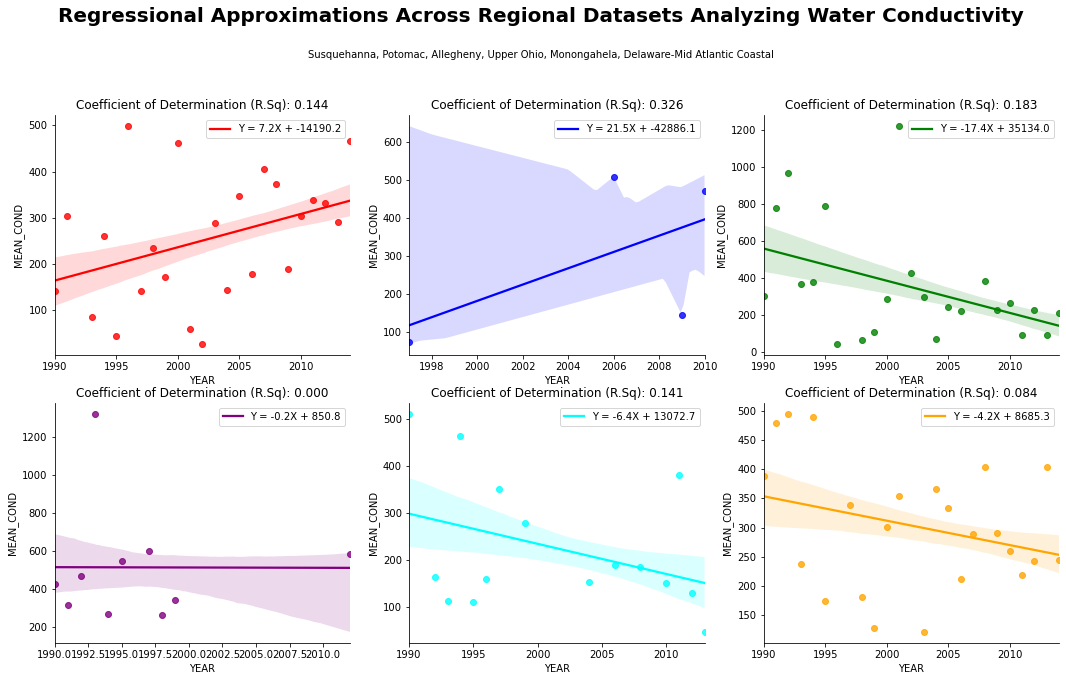

In [52]:
display_regressions_on_composite_distributions(df_q3_comp, x="YEAR", y="MEAN_COND", 
                                               title=TITLE_Q3, subtext=SUBTEXT_Q3t5)

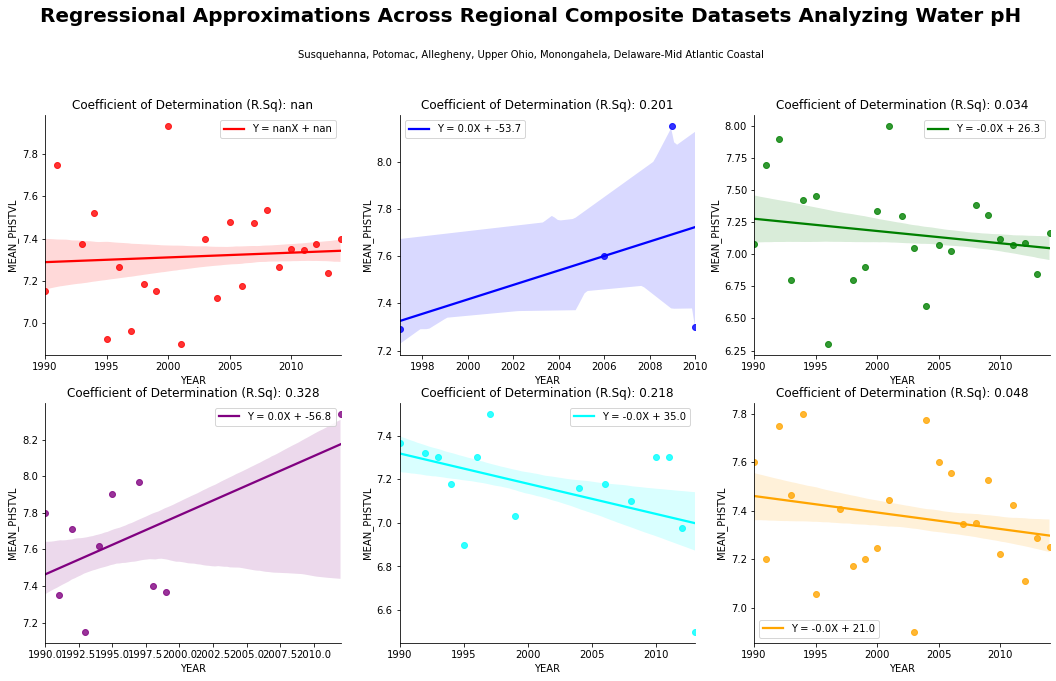

In [53]:
display_regressions_on_composite_distributions(df_q4_comp, x="YEAR", y="MEAN_PHSTVL", 
                                               title=TITLE_Q4, subtext=SUBTEXT_Q3t5)

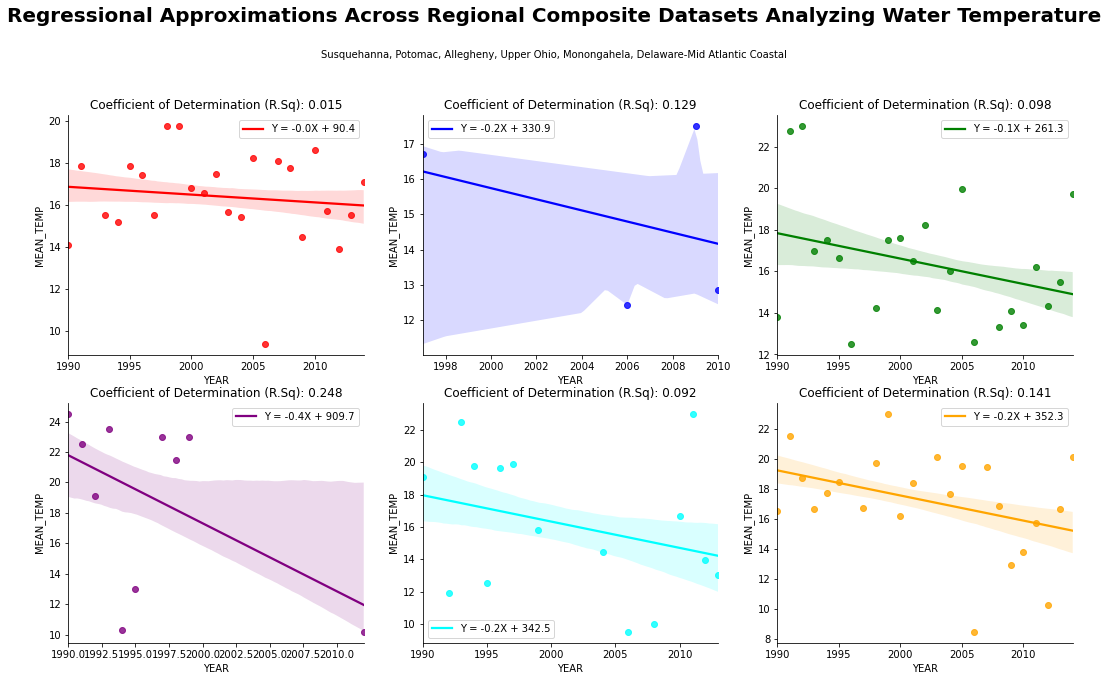

In [54]:
display_regressions_on_composite_distributions(df_q5_comp, x="YEAR", y="MEAN_TEMP", 
                                               title=TITLE_Q5, subtext=SUBTEXT_Q3t5)

Wow! There's a lot of information to unpack here, so let's dive right in.

### 👁‍🗨 Firstly, notice the spread of most (if not all) region-specific compositions.

For all three composition-dependent cases, we can see that scatter plots are relatively sparse with very high spread. 

This is further reinforced by the inclusion of an essential intermediate statistic called the **R-Squared** value. 

The **R-Squared** value – also known colloquially as the _coefficient of determination_ – measures how well a line-of-best-fit or a regression line captures the spread of our real data points. 

This coefficient always is within the range of -1.0 to +1.0, with measurements near those endpoints indicating a very high fitness of our data to the projected line-of-best-fit. 

Or to put it plainly: _the higher the magnitude of our R.Sq value, the better our line is at estimating the true relationship of the X- and y-variables._

### 🔺 Unfortunately, it appears nearly all of our regressions are quite poor based on our findings, indicating no clear trend between changes in water composition/temperature and time.

Upon my last assessment, the highest coefficient of determination we've calculated measured at a pitiful 0.328 – normally for data analysis, we expect a strong relationship indicative of some pattern in our data to measure at around at least a 0.5-0.7.

### 👁‍🗨 What could be causing this discontinuity and noise within our data? 

This is the ultimate question for data analysts and scientists to grapple with after all! 

What ideas can you come up with for why the relationship between water composition/temperature and annual progression is so weak? 

Moreover, could this indicate that there's some other variable or feature to analyze that may hold more answers as to what truly dictates the relationship we're trying to capture? 

Write some answers below!

    - SPACE RESERVED FOR WRITING ANSWERS TO PRIOR QUESTION.

---

# ⚡️ METHODS: Discussing Our Data

---

Congratulations! You've successfully completed the guided portion of the **O**cean **I**mpact **T**utorialized **A**nalysis. 

But your work isn't quite done... now it's simply time for me to take a step back and let you do what you do best: apply your own creativity and insight into this exact data analysis problem.

As an aspiring data analyst/scientist, your strength and capability comes from being able to look at new and seemingly odd datasets and apply your skill set into asking and answering complex analytical questions. 

Along the way, that same strength and capability is given fantastic opportunity to be exemplified to both technical and non-technical audiences in the form of data visualization – by creating beautiful charts, plots, and infographics that describe the relationships you're attempting to capture, you can be sure that your prowess across understanding data isn't to be trifled with.

With that being said, it's time to dive into the open-ended portion of this project. 

From this point, there'll be no instructions, data structures, code tutorials, or other forms of pointers/tips to guide your way into asking hypothesis-based inquiries and answering them through processing, analysis, and visualization.

### 👁‍🗨 Instead, it's up to you to ask, ascertain, and answer those questions creatively!

At the end of the day, don't forget: _when given a question or hypothesis, finding an answer is simply a roll of **a dice**_!

In this case, let's prepend our reliable process with a single step: 

0. **ASK** a critical hypothesis-based question in an attempt to discover a meaningful trend/pattern across your data.
1. **DECONSTRUCT** the question and break it down into relative features, labels, and needed calculations. 
2. **INVESTIGATE** your dataset and filter it down until you have the data you need to answer the question.
3. **CREATE** a visualization based on what option makes most sense to portray results in a clear manner.
4. **EXPLAIN** your findings and visualization(s) concisely, using bullet points and assertions to justify your process.

With that in mind, let's open the remainder of this project to you: the data science student.

## 🔸 PART 3: Inquiring Further

This section may appear to be the end, but in many ways, it's simply another beginning.

### 🔎 🌜 ANALYTIC/MOONSHOT OBJECTIVE(S): Open-Ended Inquiry-Based Analyses & Visualizations

Your task is simple: **select at least another three (3) testing hypotheses to evaluate using data analysis and visualization**. 

For your convenience, several testing hypotheses are provided below that you may choose from.

However, these hypotheses are intentionally simplistic and rudimentary to encourage one thing: _for you to generate your own hypothesis-based inquiries to investigate_.

Not only is this encouraged simply on behalf of cultivating good data science talent, but there is also substantial opportunity for extra credit via stretch challenges for asking and answering your own inquiries rather than selecting from the provided list. 

All that is required is to loosely follow the process we've gone through previously: 

- Analyze, process, and curate your datasets to best answer your inquiry/question.
- Choose and create an optimal data visualization that best captures the targeted relationship across your data.
- Write to defend your investigative process and interpret whether or not your question was successfully answered.

Feel free to use the remainder of the notebook provided to experiment, test, and answer the questions you choose/ask.

### 🔻 Testing Hypotheses Bank 

##### (NOTE: _Bonus credit is provided for students who opt to ignore these and ask their own analytical inquiries._)

#### 1. What species' abundance was most impacted from 1990 to 2014?
#### 2. Does the iron and manganese levels in water affect the water conductivity significantly?
#### 3. Do the iron and manganese levels (stability, changes) affect species' abundance over time?
#### 4. Does the sample collection method significantly impact chemical compound levels in the water?
#### 5. How do relative chemical and temperature levels in water affect the RPB water indices/scores?
#### 6. Do changes in dissolved oxygen dramatically impact abundance fluctuations in native species?


---

### 🔹 Experiment, Test, and Answer Three (3) Additional Analytical Inquiries

In [56]:
# SPACE RESERVED FOR OPEN-ENDED INQUIRIES

In [57]:
# SPACE RESERVED FOR OPEN-ENDED INQUIRIES

In [58]:
# SPACE RESERVED FOR OPEN-ENDED INQUIRIES

---